# Demonstration: Adjusted $R^2$ and the Fischer Test

First we have our standard header with common import statements, and a statement to make plots look nice.

In [1]:
# standard import statements
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import scipy.optimize as opt

import classlib4334

# jupyter-specific display instructions
mpl.rcParams['font.size'] = 11
mpl.rcParams['lines.linewidth'] = 2
%config InlineBackend.figure_format = 'retina'

The demonstration is all about polynomial models, so let's define a bunch of them.

In [2]:
def p1(x, a, b):
    return a + b*x

def p2(x, a, b, c):
    return a + b*x + c*x**2

def p3(x, a, b, c, d):
    return a + b*x + c*x**2 + d*x**3

def p4(x, a, b, c, d, e):
    return a + b*x + c*x**2 + d*x**3 + e*x**4

def p5(x, a, b, c, d, e, f):
    return a + b*x + c*x**2 + d*x**3 + e*x**4 + f*x**5

def p6(x, a, b, c, d, e, f, g):
    return a + b*x + c*x**2 + d*x**3 + e*x**4 + f*x**5 + g*x**6

def p7(x, a, b, c, d, e, f, g, h):
    return a + b*x + c*x**2 + d*x**3 + e*x**4 + f*x**5 + g*x**6 + h*x**7

## Example 2

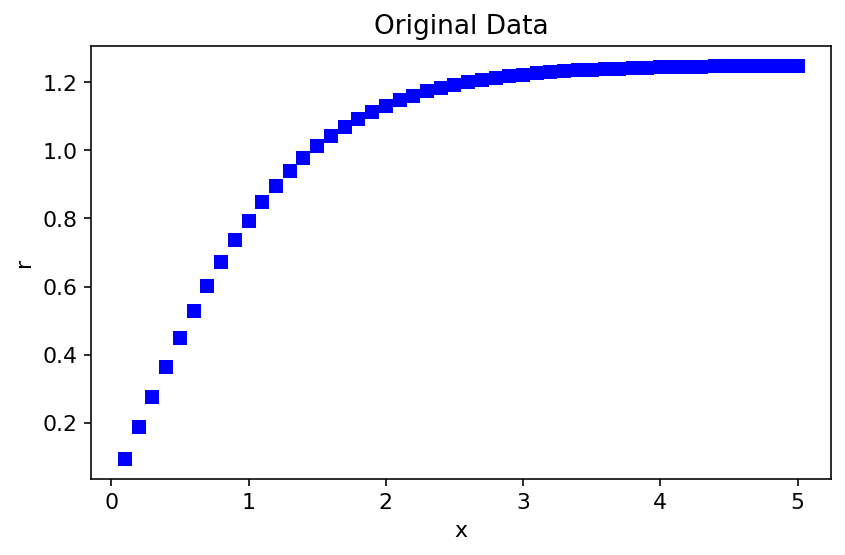

In [3]:
excel_file = 'data/demo-polynomial-3.xlsx'
mydata = pd.read_excel(excel_file)
x = np.array(mydata['x'])
y = np.array(mydata['y'])

N = len(x)
rms = np.sqrt(np.mean(y**2))
ymean = np.mean(y)

plt.figure()
plt.plot(x, y, 'bs')
plt.xlabel('x')
plt.ylabel('r')
plt.title('Original Data')
plt.tight_layout()
plt.show()

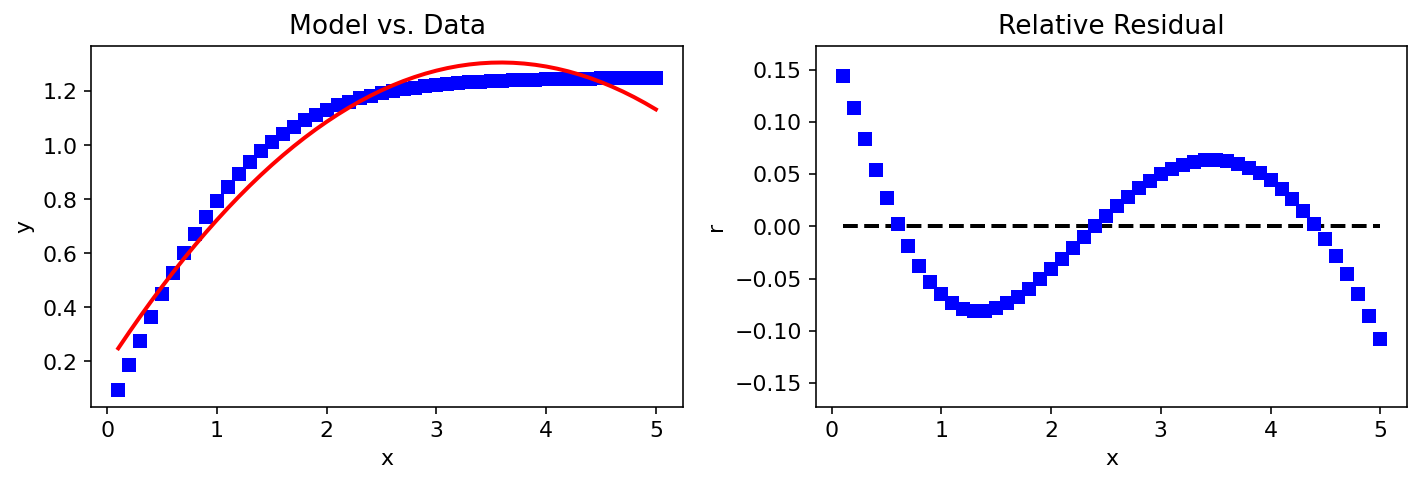

Parameter Values: 95%

   a =   0.187141 +- 0.057610
   b =   0.623833 +- 0.052111
   c =  -0.086948 +- 0.009906

absolute r-squared: 0.95921504  (1.39 nines)
adjusted r-squared: 0.95747951  (1.37 nines)




In [24]:
fit2, err2 = classlib4334.fit_and_plot(p2, x, y)

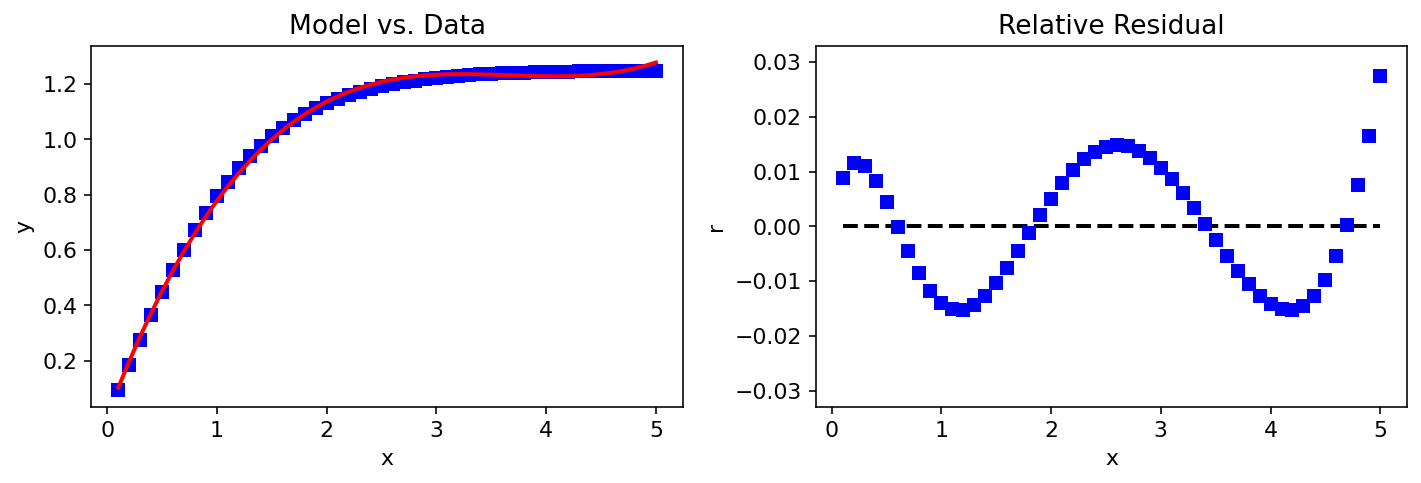

Parameter Values: 95%

   a =   0.002019 +- 0.015344
   b =   1.038999 +- 0.025798
   c =  -0.288459 +- 0.011692
   d =   0.026341 +- 0.001508

absolute r-squared: 0.99851892  (2.83 nines)
adjusted r-squared: 0.99842232  (2.80 nines)




In [26]:
fit3, err3 = classlib4334.fit_and_plot(p3, x, y)

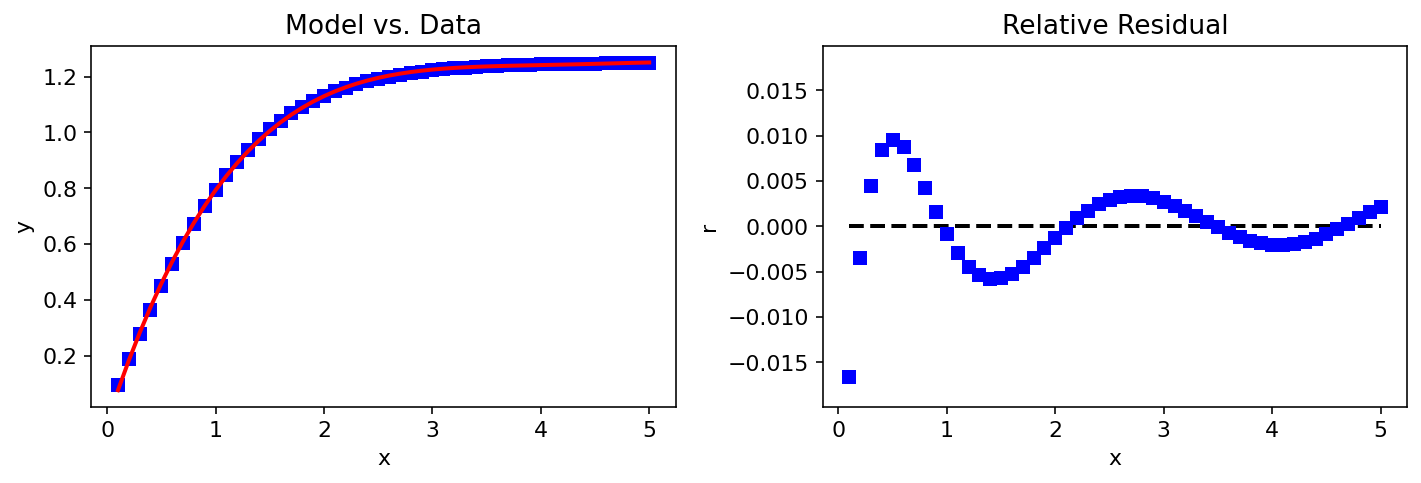

Parameter Values: 95%

   a =  -0.038768 +- 0.007786
   b =   1.185899 +- 0.020708
   c =  -0.415105 +- 0.016283
   d =   0.064711 +- 0.004775
   e =  -0.003762 +- 0.000465

absolute r-squared: 0.99978306  (3.66 nines)
adjusted r-squared: 0.99976378  (3.63 nines)




In [27]:
fit4, err4 = classlib4334.fit_and_plot(p4, x, y)

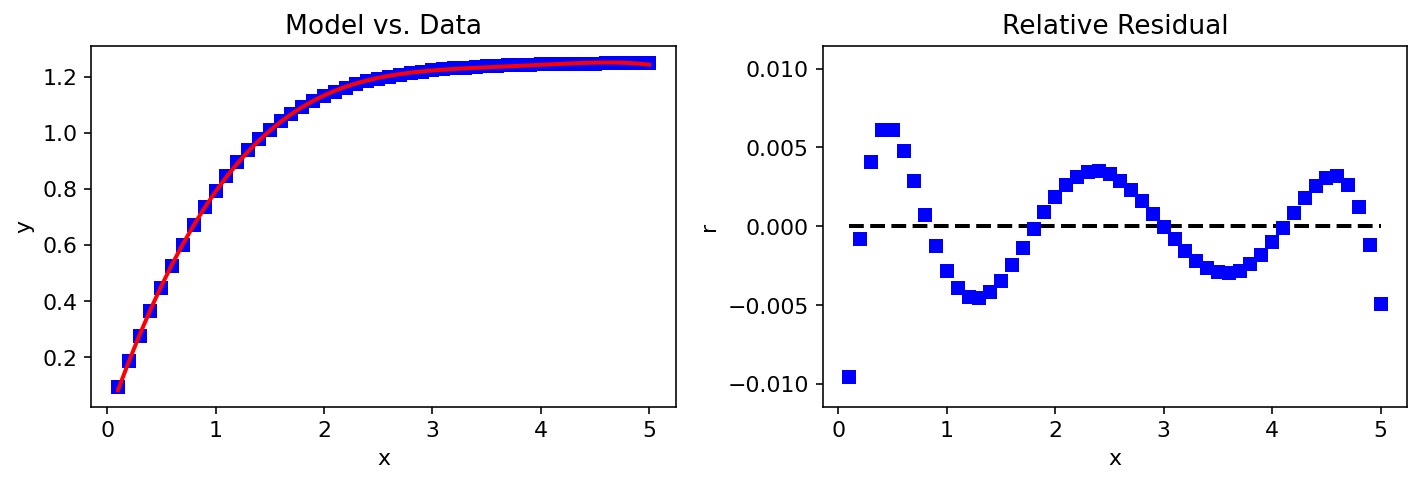

Parameter Values: 95%

   a =  -0.024948 +- 0.007460
   b =   1.114513 +- 0.028519
   c =  -0.320968 +- 0.033808
   d =   0.016239 +- 0.016620
   e =   0.006875 +- 0.003578
   f =  -0.000834 +- 0.000279

absolute r-squared: 0.99988022  (3.92 nines)
adjusted r-squared: 0.99986660  (3.87 nines)




In [28]:
fit5, err5 = classlib4334.fit_and_plot(p5, x, y)

Text(0.5, 1.0, 'Model vs. Data')

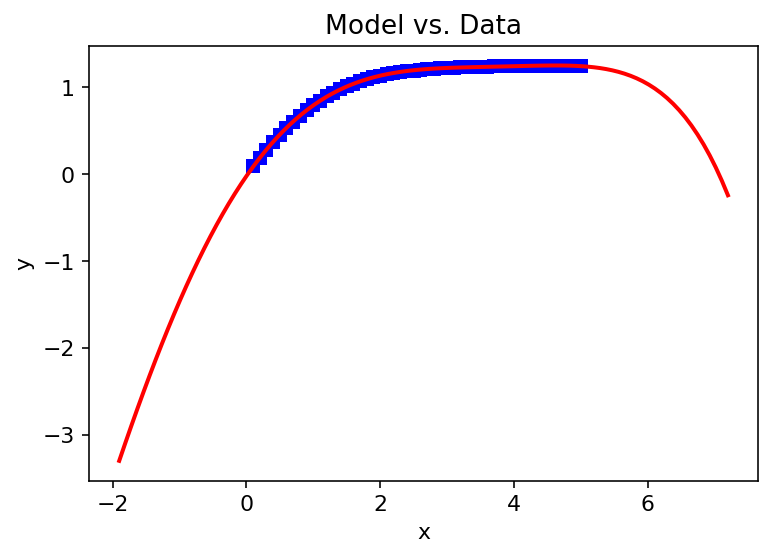

In [29]:
xext = np.linspace(min(x)-2, max(x)+2.2, 101)
pext = p5(xext, *fit5)

plt.figure()
plt.plot(x, y, 'bs')
plt.plot(xext, pext, 'r')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Model vs. Data')


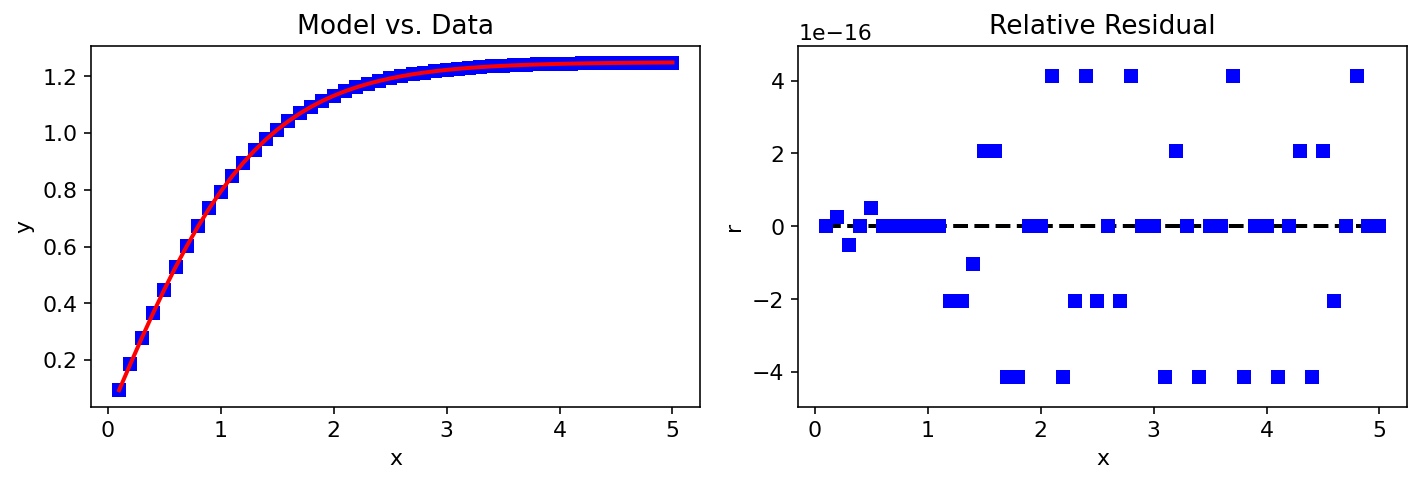

Parameter Values: 95%

   a =   1.250000 +- 0.000000
   b =   0.750000 +- 0.000000

absolute r-squared: 1.00000000  ( inf nines)
adjusted r-squared: 1.00000000  ( inf nines)




/home/snorris/Dropbox/teaching/math-4334/demos/classlib4334.py:63: RuntimeWarning: divide by zero encountered in log10
  print('absolute r-squared: %1.8f  (%4.2f nines)' % (rsq, -np.log10(1-rsq)) )
/home/snorris/Dropbox/teaching/math-4334/demos/classlib4334.py:64: RuntimeWarning: divide by zero encountered in log10
  print('adjusted r-squared: %1.8f  (%4.2f nines)' % (arsq, -np.log10(1-arsq)) )


In [30]:
def newmodel(x, a, b):
    return a*np.tanh(b*x)

fitn, errn = classlib4334.fit_and_plot(newmodel, x, y)

In [31]:
data_file = 'data/demo-polynomial-3a.xlsx'
data = pd.read_excel(data_file)
x = data['x']
ny = data['ny']

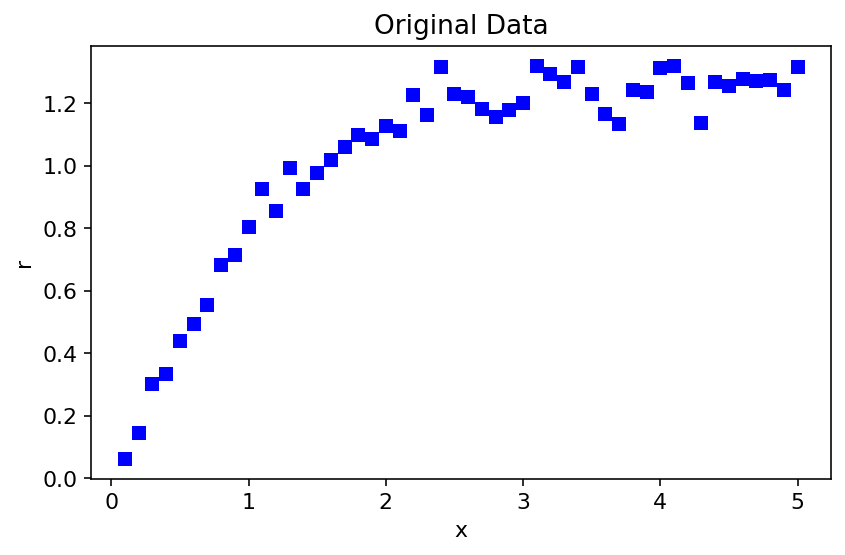

In [32]:
plt.figure()
plt.plot(x, ny, 'bs')
plt.xlabel('x')
plt.ylabel('r')
plt.title('Original Data')
plt.tight_layout()
plt.show()

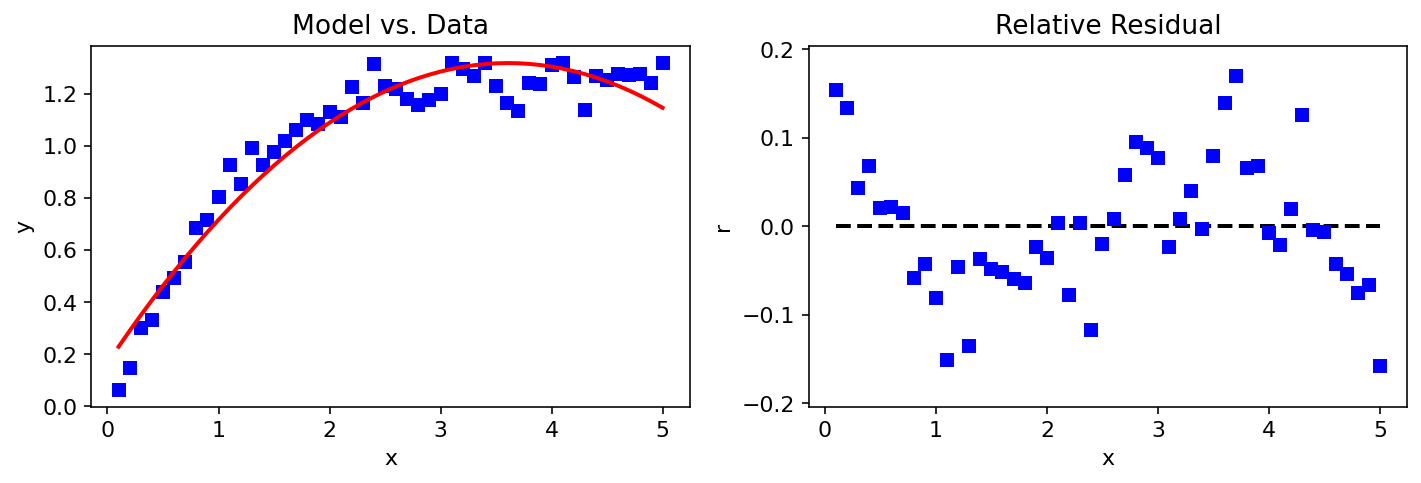

Parameter Values: 95%

   a =   0.166577 +- 0.075239
   b =   0.638631 +- 0.068058
   c =  -0.088517 +- 0.012937

absolute r-squared: 0.93627429  (1.20 nines)
adjusted r-squared: 0.93356256  (1.18 nines)




In [34]:
fit2, err2 = classlib4334.fit_and_plot(p2, x, ny)

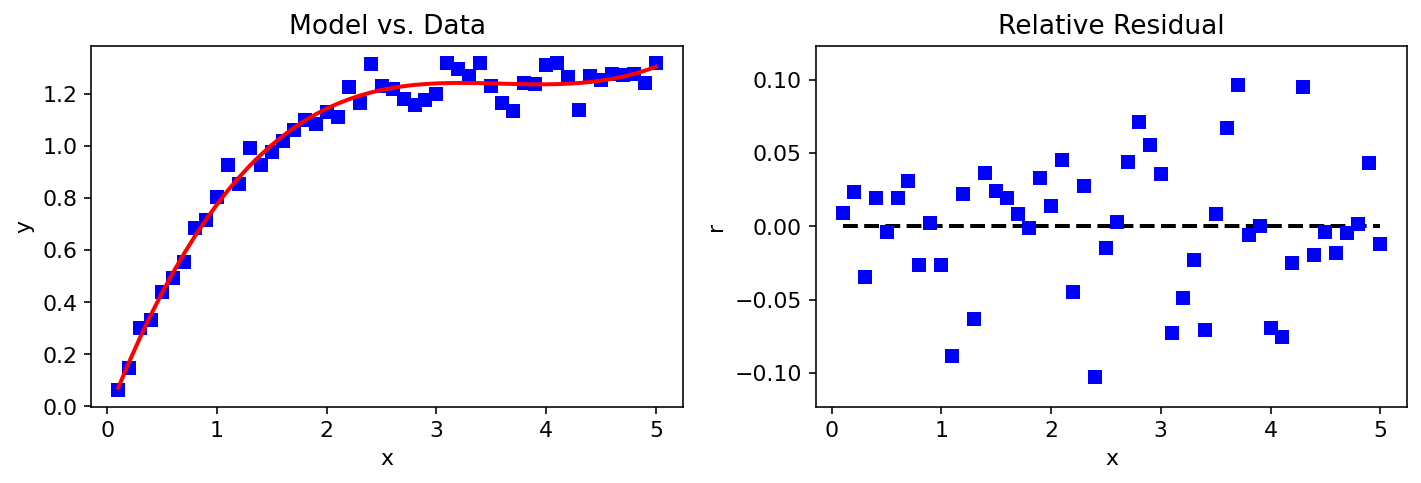

Parameter Values: 95%

   a =  -0.033608 +- 0.061256
   b =   1.087579 +- 0.102992
   c =  -0.306425 +- 0.046676
   d =   0.028485 +- 0.006020

absolute r-squared: 0.97837652  (1.67 nines)
adjusted r-squared: 0.97696629  (1.64 nines)




In [35]:
fit3, err3 = classlib4334.fit_and_plot(p3, x, ny)

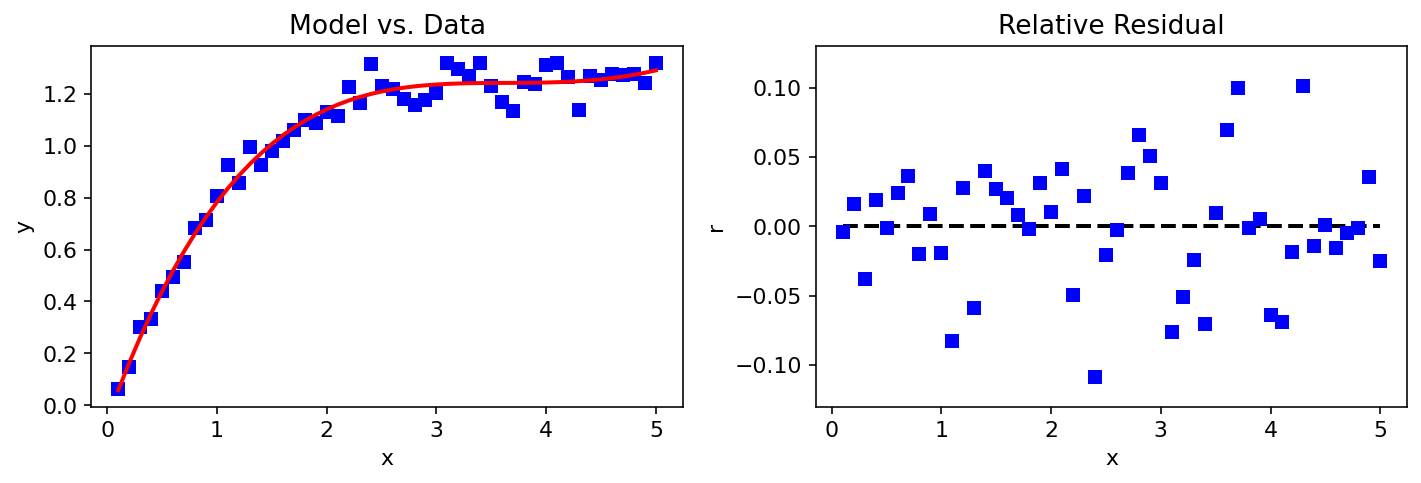

Parameter Values: 95%

   a =  -0.054488 +- 0.080650
   b =   1.162778 +- 0.214490
   c =  -0.371255 +- 0.168653
   d =   0.048126 +- 0.049455
   e =  -0.001926 +- 0.004812

absolute r-squared: 0.97867997  (1.67 nines)
adjusted r-squared: 0.97678486  (1.63 nines)




In [36]:
fit4, err4 = classlib4334.fit_and_plot(p4, x, ny)

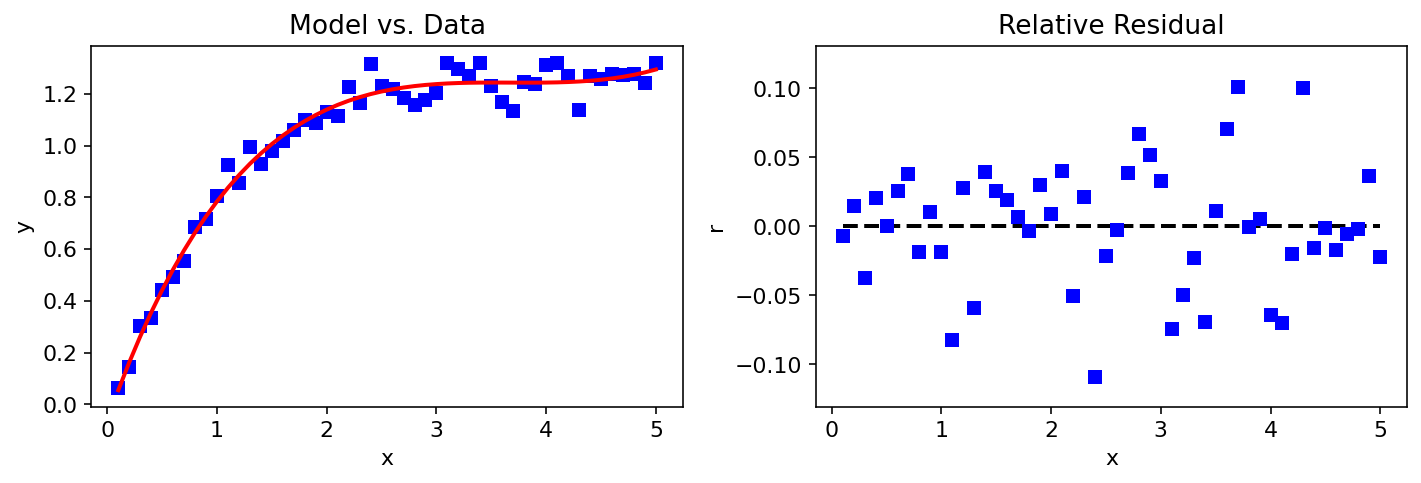

Parameter Values: 95%

   a =  -0.060788 +- 0.103934
   b =   1.195321 +- 0.397356
   c =  -0.414170 +- 0.471049
   d =   0.070223 +- 0.231561
   e =  -0.006775 +- 0.049855
   f =   0.000380 +- 0.003892

absolute r-squared: 0.97869847  (1.67 nines)
adjusted r-squared: 0.97627784  (1.62 nines)




In [37]:
fit5, err5 = classlib4334.fit_and_plot(p5, x, ny)

In [39]:
fnum34, pval34 = classlib4334.compare_nested(x, ny, p3, p4)

F-test comparing p3 (simple) vs. p4 (complex)

  F-number: 0.6405 
  P-value:  0.4277 
  Random?   42.774%

It is recommended to prefer the simple function.



Text(0.5, 1.0, 'Model vs. Data')

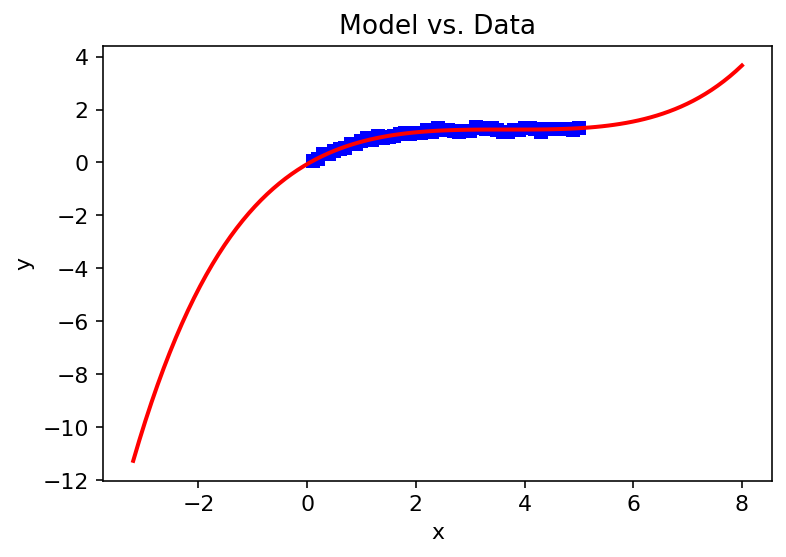

In [40]:
xext = np.linspace(min(x)-3.3, max(x)+3, 101)
pext = p5(xext, *fit5)

plt.figure()
plt.plot(x, ny, 'bs')
plt.plot(xext, pext, 'r')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Model vs. Data')

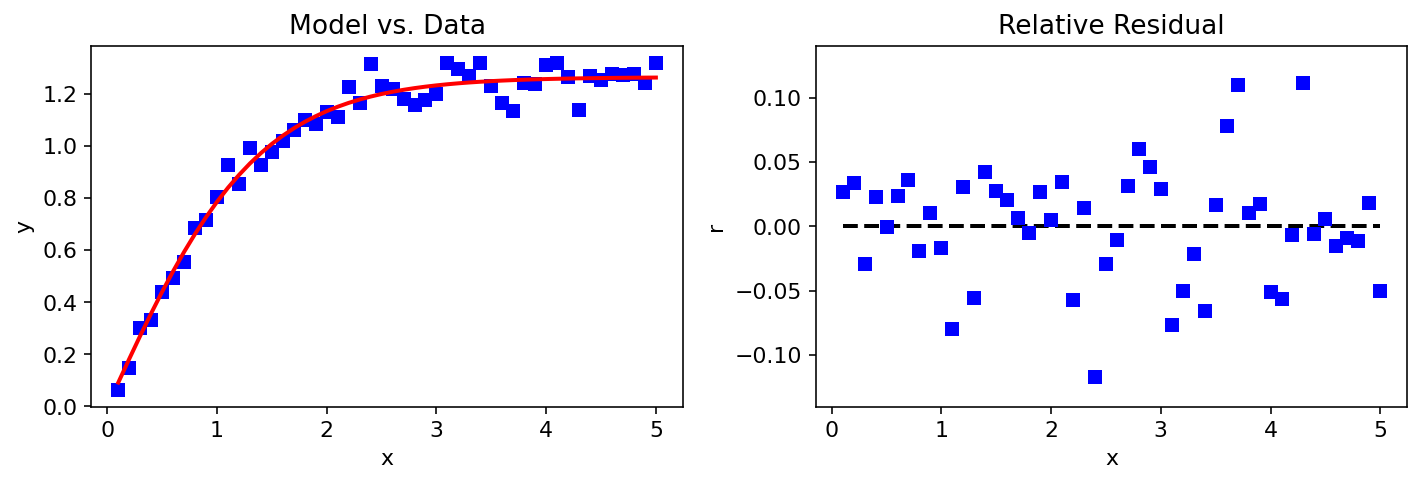

Parameter Values: 95%

   a =   1.264644 +- 0.021641
   b =   0.727395 +- 0.043908

absolute r-squared: 0.97779856  (1.65 nines)
adjusted r-squared: 0.97733603  (1.64 nines)




In [41]:
fit, err = classlib4334.fit_and_plot(newmodel, x, ny)